# Multilayer Perceptron (MLP) and "A Neural Probabilistic Language Model" (Bengio et al., 2003)

## **Multilayer Perceptron (MLP)**

**MLP** stands for **Multilayer Perceptron**, a type of artificial neural network commonly used in machine learning. It is one of the simplest forms of deep learning models and serves as the foundation for more advanced architectures.

---

### **Key Components**
1. **Input Layer**:
   - Takes the input features (e.g., pixel values, sensor readings, etc.).
   - The number of neurons equals the dimensionality of the input data.

2. **Hidden Layers**:
   - Consists of one or more layers of neurons between the input and output layers.
   - Each neuron applies a weighted sum of its inputs followed by a nonlinear activation function.
   - Hidden layers allow the MLP to model complex relationships.

3. **Output Layer**:
   - Produces the final result (e.g., class probabilities, regression output).
   - The number of neurons depends on the task:
     - For classification: one neuron per class.
     - For regression: usually a single neuron.

4. **Weights and Biases**:
   - Weights determine the strength of the connections between neurons.
   - Bias terms shift the output of the activation functions, improving flexibility.

5. **Activation Functions**:
   - Introduce nonlinearity to the model, allowing it to learn complex patterns.
   - Common functions:
     - **ReLU (Rectified Linear Unit):** \( f(x) = \max(0, x) \)
     - **Sigmoid:** \( f(x) = \frac{1}{1 + e^{-x}} \)
     - **Tanh:** \( f(x) = \tanh(x) \)

---

### **How It Works**
1. **Forward Propagation**:
   - Input data is passed through the layers, where each layer applies:
     - Weighted sum: \( z = w \cdot x + b \)
     - Activation: \( a = f(z) \)
   - This process generates predictions in the output layer.

2. **Loss Calculation**:
   - A loss function measures the difference between predicted and actual outputs.
   - Common loss functions:
     - **Mean Squared Error (MSE):** For regression tasks.
     - **Cross-Entropy Loss:** For classification tasks.

3. **Backward Propagation**:
   - The model adjusts weights and biases to minimize the loss using gradient descent or its variants.
   - Gradients are computed using the chain rule of derivatives.

---

## **A Neural Probabilistic Language Model** (Bengio et al., 2003)

This paper introduced one of the first neural network-based approaches to language modeling, addressing the limitations of traditional n-gram models. It is an example of using an MLP for a real-world task.

---

### **Key Contributions**
1. **Problem with Traditional Models**:
   - Conventional n-gram language models suffer from:
     - **Data sparsity**: Exponential growth of parameters with vocabulary size and context length.
     - **Poor generalization**: Struggle to handle unseen word combinations.

2. **Proposed Neural Probabilistic Language Model**:
   - A novel architecture that uses an MLP to model the probability distribution of word sequences.
   - Combines distributed representations (word embeddings) with neural networks.

3. **Model Architecture**:
   - **Inputs**: Encodes a fixed-size window of preceding words as context.
   - **Embedding Layer**: Maps words to a continuous vector space (word embeddings).
   - **MLP Hidden Layer**: Captures non-linear relationships in the input embeddings.
   - **Output Layer**: Predicts the probability distribution over the vocabulary for the next word.

4. **Learning Objective**:
   - Maximizes the likelihood of the observed word sequences:
     \[
     \mathcal{L} = \sum_{i=1}^{N} \log P(w_i \mid w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
     \]

5. **Key Insight**:
   - By learning embeddings, the model generalizes better than traditional n-grams, as similar words have similar embeddings, making the model robust to data sparsity.

---

### **Connection to MLP**
- The **MLP** is the core of Bengio et al.'s language model. It processes word embeddings (input features) through hidden layers and outputs probabilities for the next word.
- The hidden layers enable the model to learn complex, non-linear patterns in word sequences, a critical advantage over traditional models.

---

## **Impact and Legacy**
- This work laid the foundation for modern NLP, including word embeddings (e.g., Word2Vec, GloVe) and advanced architectures like RNNs and Transformers.
- Demonstrated the potential of MLPs in real-world applications, inspiring further exploration into neural networks for language tasks.

---

### **References**
- Bengio, Y., Ducharme, R., Vincent, P., & Jauvin, C. (2003). *A Neural Probabilistic Language Model*. Journal of Machine Learning Research, 3, 1137-1155.
ting house prices).
- Feature extraction in preprocessed data.


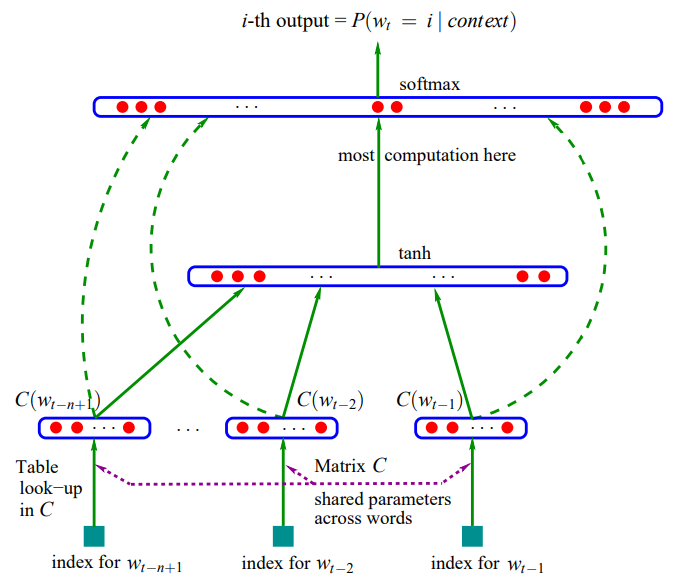

## Character Level


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reads the names in the file
words = open("names.txt","r").read().splitlines()
words[:5],len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia'], 32033)

In [50]:
#build the vocabulary of characters and mapping from/to integers
chars = sorted(set("".join(words)))
stoi = {s:i+1 for i,s in enumerate(chars)} 
stoi['.']=0
itos = {s:i for i,s in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [4]:
#build the dataset
block_size = 3
X,Y = [],[]

for word in words:
    y = [0]*block_size
    for ch in word+'.':
        ix = stoi[ch]
        Y.append(ix)
        X.append(y)
        print(f"{y} --> {ix}")
        y = y[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

[0, 0, 0] --> 5
[0, 0, 5] --> 13
[0, 5, 13] --> 13
[5, 13, 13] --> 1
[13, 13, 1] --> 0
[0, 0, 0] --> 15
[0, 0, 15] --> 12
[0, 15, 12] --> 9
[15, 12, 9] --> 22
[12, 9, 22] --> 9
[9, 22, 9] --> 1
[22, 9, 1] --> 0
[0, 0, 0] --> 1
[0, 0, 1] --> 22
[0, 1, 22] --> 1
[1, 22, 1] --> 0
[0, 0, 0] --> 9
[0, 0, 9] --> 19
[0, 9, 19] --> 1
[9, 19, 1] --> 2
[19, 1, 2] --> 5
[1, 2, 5] --> 12
[2, 5, 12] --> 12
[5, 12, 12] --> 1
[12, 12, 1] --> 0
[0, 0, 0] --> 19
[0, 0, 19] --> 15
[0, 19, 15] --> 16
[19, 15, 16] --> 8
[15, 16, 8] --> 9
[16, 8, 9] --> 1
[8, 9, 1] --> 0
[0, 0, 0] --> 3
[0, 0, 3] --> 8
[0, 3, 8] --> 1
[3, 8, 1] --> 18
[8, 1, 18] --> 12
[1, 18, 12] --> 15
[18, 12, 15] --> 20
[12, 15, 20] --> 20
[15, 20, 20] --> 5
[20, 20, 5] --> 0
[0, 0, 0] --> 13
[0, 0, 13] --> 9
[0, 13, 9] --> 1
[13, 9, 1] --> 0
[0, 0, 0] --> 1
[0, 0, 1] --> 13
[0, 1, 13] --> 5
[1, 13, 5] --> 12
[13, 5, 12] --> 9
[5, 12, 9] --> 1
[12, 9, 1] --> 0
[0, 0, 0] --> 8
[0, 0, 8] --> 1
[0, 8, 1] --> 18
[8, 1, 18] --> 16
[1, 18, 1

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [27]:
import random

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print('X:', X.shape, '\tY:', Y.shape)
    return X,Y

random.seed(42)          # for reproducibility
random.shuffle(words)    # words is just the bare list of all names, from wayyy above
n1 = int(0.8*len(words)) # index at 80% of all words (rounded for integer indexing)
n2 = int(0.9*len(words)) # index at 90% of all words (rounded for integer indexing)

print('Training Set:')
Xtr, Ytr = build_dataset(words[:n1])     # The first 80% of all words
print('Validation Set:')
Xdev, Ydev = build_dataset(words[n1:n2]) # The 10% from 80% to 90% of all words
print('Test Set:')
Xte, Yte = build_dataset(words[n2:])     # The 10% from 90% to 100% of all words

Training Set:
X: torch.Size([182625, 3]) 	Y: torch.Size([182625])
Validation Set:
X: torch.Size([22655, 3]) 	Y: torch.Size([22655])
Test Set:
X: torch.Size([22866, 3]) 	Y: torch.Size([22866])


In [5]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [6]:
# look up table
C = torch.randn((27,2))
#each value is replaced with its encoded value
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [7]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)


In [8]:
# emb@W1+b1

In [9]:
# we need to merge 32,3,2 --> 32,6 like merging all the encoding of the words
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape #The 1 refers to the dimension along which the concatenation is performed.(0,1,2,3..)

#generic method
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

Assume emb is a 3D tensor of shape (batch_size, num_slices, embedding_dim):

batch_size: Number of samples in the batch.

num_slices: The number of "slices" along dimension 1 (the second dimension).

embedding_dim: Dimensionality of each slice.


Operation:

torch.unbind(emb, 1) will split emb along dimension 1 (the second dimension).
The result will be a tuple of num_slices tensors, where each tensor has the shape (batch_size, embedding_dim).
Effect:

For each value along dimension 1 (e.g., emb[:, i, :]), torch.unbind() extracts that slice and returns it as an individual tensor.

In [10]:
h=emb.view(-1,6)@W1+b1  #more efficinet as no new memory is created only some internal attributes changed
h.shape

torch.Size([228146, 100])

In [11]:
h= torch.tanh(h)
h

tensor([[ 0.2430,  0.9741, -0.1366,  ...,  0.8829, -0.5568,  0.1435],
        [-0.5218,  0.9982, -0.9658,  ..., -0.7647,  0.2245, -0.9426],
        [ 0.4766,  0.9726,  0.9752,  ...,  0.9908, -0.9339,  0.9887],
        ...,
        [-0.9985,  1.0000, -0.9410,  ...,  0.9927, -0.9976,  0.3210],
        [ 0.9521,  0.2851, -0.6796,  ...,  0.4373,  0.9547,  0.7796],
        [-0.9994,  1.0000, -0.6244,  ...,  0.9832, -0.9998, -0.8507]])

In [12]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [13]:
logits = h@W2 + b2 #logits->probability of an event occurring
logits.shape

torch.Size([228146, 27])

In [14]:
parameters = [C,W1,b1,W2,b2]
# Allowing for gradient accumulation
for p in parameters:
    p.requires_grad = True

In [15]:
# counts = logits.exp() -> we might right of memory to store very large values ,so subtracting a offset might not change the distribution
#pytorch (cross_entropy) does-> logits - max(logits) ,so end up all negative which is fine
# prob = counts/counts.sum(1,keepdims = True)
# loss = -prob[torch.arange(32),Y].log().mean()

In [17]:
#forward pass
loss=F.cross_entropy(logits,Y)
loss.item()

19.475467681884766

In [26]:
epochs = 1000
for _ in range(epochs):
    #minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # Forward-Pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)

    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    
    # Replacing the above lines with PyTorch's built-in cross entropy loss function:
    # this function behaves better numerically and avoids pitfalls like infinities by subtracting the maximum value from all logits before exponentiating
    loss = F.cross_entropy(logits, Y[ix])

    # Backward-Pass
    for p in parameters:
        p.grad = None # Reset gradients (done before each backward pass to avoid accumulation over multiple passes)
    
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad # Nudge parameter values in negative gradient direction (learning rate = 0.1)

print(loss.item())

2.5458691120147705


In [28]:
# Reset the parameters once again
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2), generator=g)          # 27 characters, 2 dimensions each
W1 = torch.randn((6,100), generator=g)        # 3 characters times 2 embedding values as inputs to 100 neurons
b1 = torch.randn((100), generator=g)          # 100 biases added to the 100 neuron outputs
W2 = torch.randn((100,27), generator=g)       # 100 neuron outputs as inputs to 27 output neurons
b2 = torch.randn((27), generator=g)           # 27 biases added to the 27 output neurons

parameters = [C, W1, b1, W2, b2] # Cluster all parameters into one structure

print(sum(p.nelement() for p in parameters), 'parameters')

for p in parameters:
    p.requires_grad = True

3481 parameters


In [29]:
for i in range(40000):
    
    # mini-batch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # Forward-Pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # Backward-Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Learning rate decay to more closely approach the minimum
    lr = 0.1 if i < 30000 else 0.01

    for p in parameters:
        p.data += -lr * p.grad
    
# print('Loss for current mini-batch:', loss.item())

In [30]:
# Validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.3331336975097656


In [31]:
# Test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.3363959789276123


* we are not overfitting so we can increase the size of the model,most likely underfit

In [41]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,2),generator = g)
W1 = torch.randn((6,300),generator = g)
b1 = torch.randn(300,generator =g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C,W1,b1,W2,b2] 

print(sum(p.nelement() for p in parameters)," parameters")
for p in parameters:
    p.requires_grad = True

10281  parameters


In [42]:
lossi = [] # list of losses per mini-batch
stepi = [] # list of steps (mini-batches)

for i in range(180000):
    
    # mini-batch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # Forward-Pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) 
    
    # Backward-Pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    lr = 0.1 if i < 100000 else 0.01
    
    for p in parameters:
        p.data += -lr * p.grad
    
    # Loss per mini-batch tracking
    stepi.append(i)
    lossi.append(loss.item())
    
#print('Loss for current mini-batch:', loss.item())

In [43]:
# Validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2399895191192627


In [44]:
# Test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.2385780811309814


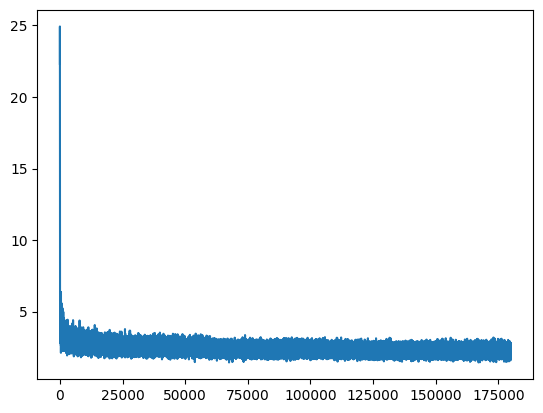

In [45]:
plt.plot(stepi, lossi);

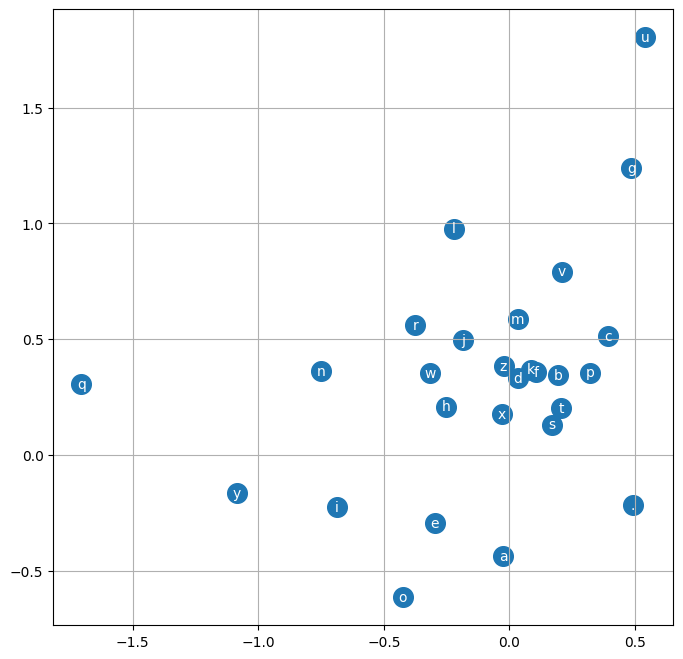

In [51]:
# This code plots the 2-dimensional embeddings of the 27 characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [52]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

mriah.
myannieel.
ndyn.
alarethastendraem.
azerydieliighli.
jelle.
eliyananar.
kayzior.
kalin.
shabergiairiel.
kin.
reellionnie.
cayuh.
kavder.
yarulieh.
yuvi.
mustoudrihal.
salynn.
ufe.
alelianne.
